# 机器学习算法基础

## KNN

### 算法思想

特征空间中的一个样本，如果与其最相似的k个样本中的大部分属于某个类别，则该样本也属于该类别。

### 特点

KNN的优点：简单有效，易于实现；无须训练（或训练很快）

KNN的缺点：懒惰算法，数据集的样本容量大时计算量比较大，评分慢；样本不平衡时，预测偏差比较大。

### KNN关键因素

度量距离

k值选择

决策规则

归一化

### 度量距离

欧式距离：两点间的连线距离。

曼哈顿距离：两点间的连线投影到坐标轴的长度之和。

切比雪夫距离：各坐标数值差的最大值，想想扫雷。

### 代码：用KNN预测鸢尾花品种

In [138]:
import numpy as np
import pandas as pd

In [139]:
iris_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',names=['sepal_length','sepal_width','petal_length','petal-width','class'])

In [140]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [141]:
from matplotlib import pyplot as plt

In [142]:
grouped_data=iris_data.groupby('class')# 分组

In [143]:
group_mean=grouped_data.mean()# 求平均数

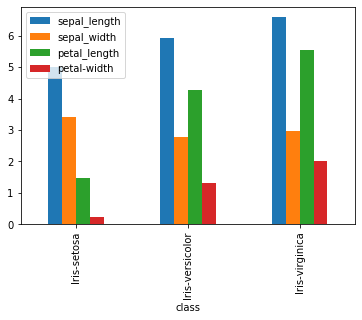

In [144]:
group_mean.plot(kind='bar')# 画柱状图

In [145]:
msk=np.random.rand(len(iris_data))<0.8# 生成随机数，并选择小于0.8的数据
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,

In [146]:
train_data_origin=iris_data[msk]
test_data_origin=iris_data[~msk]

In [147]:
train_data_origin

,sepal_length,sepal_width,petal_length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [148]:
# 索引重置,True不保留原有的索引
train_data=train_data_origin.reset_index(drop=True)
test_data=test_data_origin.reset_index(drop=True)

In [149]:
train_label=train_data['class']
test_label=test_data['class']

In [150]:
# 1表示丢弃列，默认axis=0，表示行
train_feature=train_data.drop('class',1)
test_feature=test_data.drop('class',1)
train_feature

,sepal_length,sepal_width,petal_length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
123,6.7,3.0,5.2,2.3
124,6.3,2.5,5.0,1.9
125,6.5,3.0,5.2,2.0
126,6.2,3.4,5.4,2.3


归一化

In [151]:
# 因为不同特征之间差距过大，某个特征的权重会过高，所以要归一化
train_norm=(train_feature-train_feature.min())/(train_feature.max()-train_feature.min())
test_norm=(test_feature-test_feature.min())/(test_feature.max()-test_feature.min())
train_norm

,sepal_length,sepal_width,petal_length,petal-width
0,0.222222,0.590909,0.067797,0.041667
1,0.166667,0.363636,0.067797,0.041667
2,0.111111,0.454545,0.050847,0.041667
3,0.083333,0.409091,0.084746,0.041667
4,0.194444,0.636364,0.067797,0.041667
...,...,...,...,...
123,0.666667,0.363636,0.711864,0.916667
124,0.555556,0.136364,0.677966,0.750000
125,0.611111,0.363636,0.711864,0.791667
126,0.527778,0.545455,0.745763,0.916667


In [152]:
# 预测模型的正确率
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0

In [153]:
from sklearn import neighbors

In [154]:
# 定义knn模型
knn=neighbors.KNeighborsClassifier(n_neighbors=3)#k=3
knn.fit(train_norm,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [155]:
predict=knn.predict(test_norm)

In [156]:
accuracy=getAccuracy(test_label,predict)

In [157]:
print("Accuracy:"+repr(accuracy)+"%")

Accuracy:95.45454545454545%


### KNN总结

KNN算法是机器学习中最简单、有效的算法。本节通过鸢尾花品种分类的示例详细介绍了KNN算法的实现原理和应用。KNN算法属于懒惰学习算法，当数据集的样本容量比较大时，计算量也会比较大，并且需要较大的存储空间。此外，它无法给出数据的任何基础结构信息，后面章节中介绍的算法将会解决这个问题。

## 线性回归

### 简介

在统计学中，线性回归是一种线性方法，用于对因变量y和一个或多个自变量之间的线性关系进行建模。当只有一个自变量时，这种回归分析称为一元回归分析；当有两个或两个以上的自变量时，则称这种回归分析为多元回归分析。线性回归主要解决回归问题，即对**连续型的数据**进行预测，比如预测房价、销售量等

线性回归的目标是，对于输入向量x，预测其目标值y。

如果只是简单地使用预测值和真实值的差值来评估，会导致正差值和负差值相互抵消，并不符合实际情况，因此采用平方误差，该函数即可作为线性回归的损失函数。损失函数值越小，则ω越接近理想值，问题转化成了求解损失函数L（ω）取值最小值时的ω。



这个问题的求解方法有很多，比如采用数学方法对ω进行求解，这种方法称为正规方程。该方法主要是利用微积分的知识

除了正规方程外，在求解机器学习算法的模型参数时，另一种常用的方法是梯度下降法

多元函数对每个参数求偏导，然后将各个参数的偏导数组合成一个向量，该向量称为梯度，它的几何意义是函数值增加最快的方向。例如f（x,y），对参数x求偏导数为，对参数y求偏导数为，组成梯度向量，简称为▽f（x,y）。函数f（x,y）在点（x0,y0）处，如果沿着梯度方向▽f（x,y）移动，其函数值增加得最快，换句话说，就是能更快地找到最大值。反之，如果沿着梯度的反方向移动，则函数值下降得最快，更容易找到最小值。

MSE（Mean Squared Error，均方误差）是指预测值和真实值差值平方的期望值，定义如下：

### 通过线性回归预测波士顿房屋价格

In [161]:
from sklearn import datasets # scikit-learn集成的数据

In [162]:
boston=datasets.load_boston()

In [163]:
X=boston.data #这是一个向量
y=boston.target

使用train_test_split将数据集划分为训练集特征、测试集特征、训练集标签、测试集标签4个数据集。将test_size参数设为1/5，表示测试集在划分数据中的占比为1/5，如果配置整数，则表示测试集中的样本个数。random_state是随机数发生器的种子。

In [167]:
from sklearn.model_selection import train_test_split # 书中此处有问题

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=0)

然后可以定义线性回归模型，并通过训练集特征X_train和训练集标签y_train对模型进行训练。模型训练完成后，使用predict（）函数对测试集特征X_test进行预测，得到预测结果y_pred。最后用均方误差评估模型预测效果。实现代码如下：

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [171]:
lr=LinearRegression()#线性回归

In [172]:
lr.fit(X_train,y_train)#训练模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
y_pred=lr.predict(X_test)

In [177]:
mse=mean_squared_error(y_test,y_pred)#均方差评估预测效果，越小越好

In [179]:
print("MSE:"+str(mse))

MSE:33.44897999767653
